In [202]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [203]:
%matplotlib inline
ecom = pd.read_excel("E Commerce Dataset.xlsx", sheet_name='E Comm')

Penjelasan mengenai variabel ada disini

- Customer ID = Id tiap customer
- Churn = Label customer churn atau tidak (1 Churn dan 0 tidak Churn)
- Tenure = lama pelanggan diukur dari pembelian pertama
- PreferredLoginDevice = perangkat yang digunakan pelanggan untuk login
- CityTier = Tingkat kota
- WarehouseToHome = jarak gudang ke rumah (estimasi dalam bentuk km)
- PreferredPaymentMode = metode pembayaran
- Gender = jenis kelamin
- HourSpendOnApp = jumlah jam yang dihabiskan pada aplikasi(kemungkinan diambil rata" tiap hari)
- PreferedOrderCat = kategori pesanan bulan lalu
- SatisfactionScore = tingak kepuasan pelanggan (mungkin diambil dalam bentuk review bintang)
- MaritalStatus = status pernikahan customer
- NumberOfAddress = total alamat yang ditambahkan pada tiap customer
- Complain = apakah ada keluhan pada customer tersebut bulan lalu
- OrderAmountHikeFromlastYear = peningkatan presentase pembelian dari tahun lalu
- CouponUsed = total kupon yang digunakan pada bulan lalu
- OrderCount = jumlah pesanan yang dilakukan pada bulan kemarin
- DaySinceLastOrder = terakhir customer melakukan order
- CashbackAmount = rata' cashabck yang didapat pada bulan lalu

In [204]:
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [205]:
ecom['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [206]:
ecom.info() #melihat feature numerik dan kategorikal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [207]:
ecom.shape

(5630, 20)

In [208]:
ecom.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [209]:
ecom.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

# HANDLING MISSING VALUE

In [210]:
ecom_origin = ecom.copy()

In [211]:
ecom.isnull().sum() #Perlu dilakukan handling missing value. karena missing value kurang dari 10% dari data keseluruhan tidak perlu delete coloumn

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Jika menggunakan remove row

In [212]:
ecom1 = ecom.dropna()

In [213]:
ecom1.shape

(3774, 20)

In [214]:
ecom1.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [215]:
ecom1.to_csv('Dataset_ecom1.csv')

Delete coloumn jika ada yang melebihi 10%

In [216]:
for col in ecom:
    if ecom[col].isnull().sum() > 563:
        ecom.drop(col, axis=1, inplace=True)

In [217]:
ecom.shape

(5630, 20)

Jika menggunakan skew

In [218]:
from scipy.stats import skew

In [219]:
cat = ecom.select_dtypes('object')
num = ecom.select_dtypes('number')

In [220]:
numerikal = []
kategorikal = []
for i in cat.columns:
    kategorikal.append(i)
for i in num.columns:
    numerikal.append(i)

In [221]:
kategorikal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [222]:
numerikal

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [223]:
ob = 'object'
for col in ecom:
    result = ecom[col].dtype
    if result != ob:
        skewvalue = ecom[col].skew(axis=0, skipna=True)
        if skewvalue <=0.5 and skewvalue >= -0.5:
            ecom[col].fillna(value=ecom[col].mean(), inplace=True)
        else:
            ecom[col].fillna(value=ecom[col].median(),inplace=True)

In [224]:
ecom.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [225]:
ecom.shape

(5630, 20)

In [226]:
ecom.to_csv('Dataset_ecom.csv')

# Comparing handling missing value and quick modeling using pycaret

Ecom1

![Pycaret](ecom1_pycaret.jpg)

Ecom

![Pycaret](ecom_pycaret.jpg)

- Ecom 1 adalah penangan missing value menggunakan remove rows
- ecom adalah penanganan missing value menggunakan skew

# Handling Outlier

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

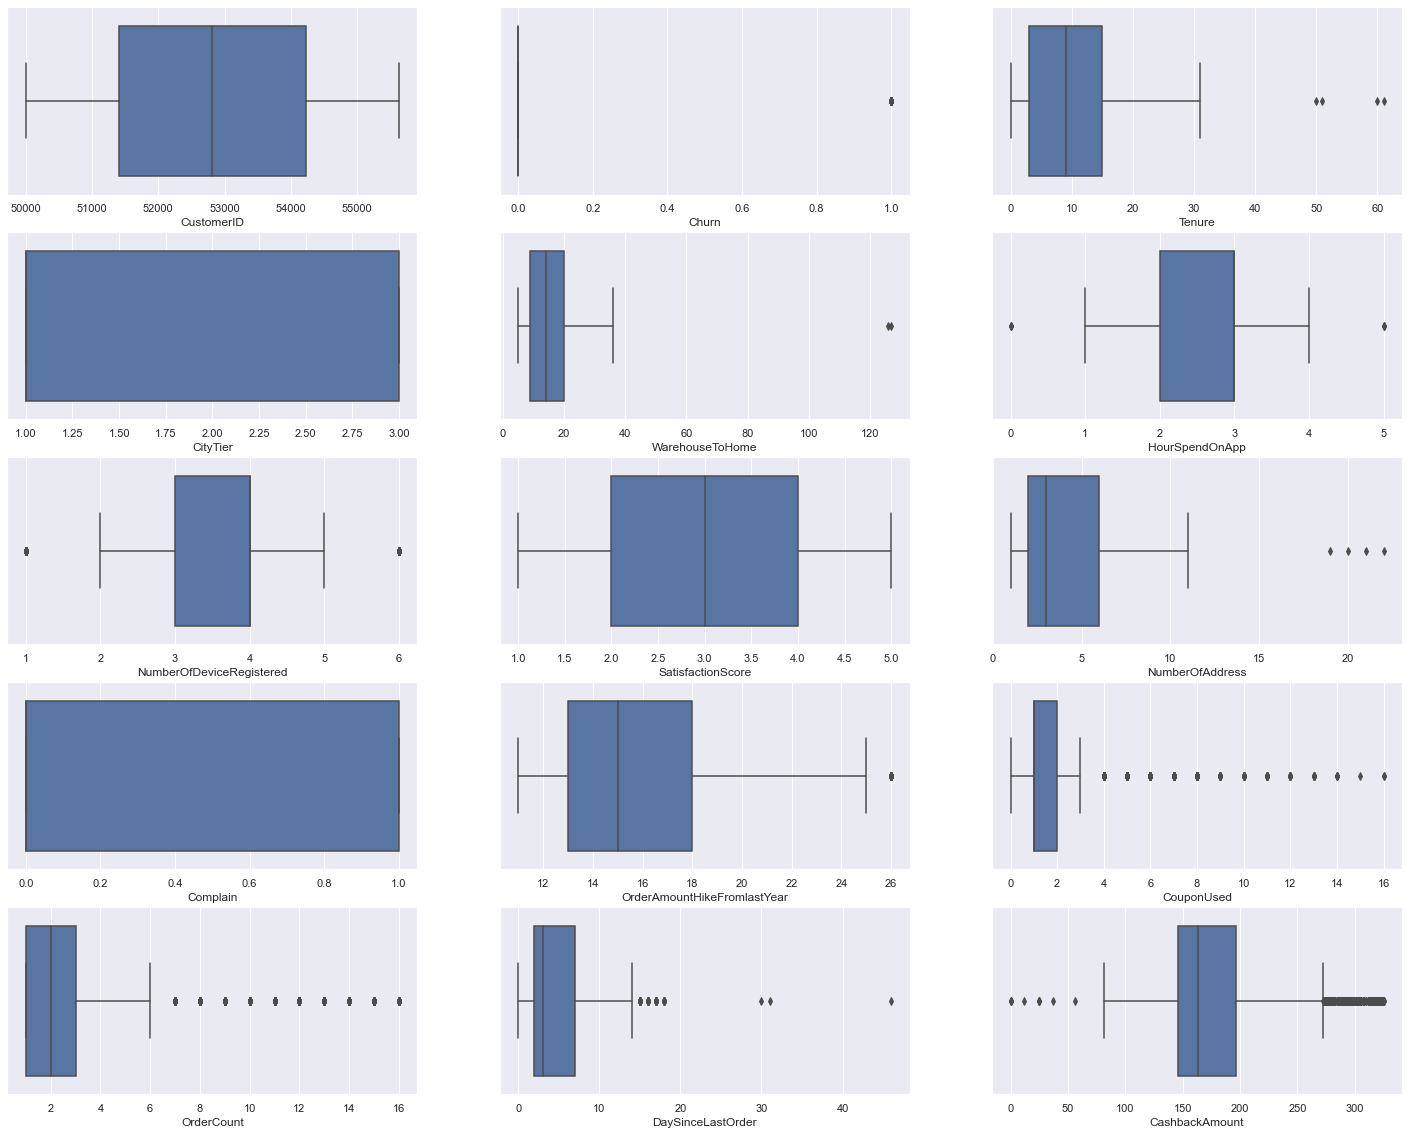

In [228]:
plt.figure(figsize=(25,20))
for i in range(len(numerikal)):
    plt.subplot(5,3,i+1)
    sns.boxplot(ecom[numerikal[i]])
    plt.tight_layout
plt.show()

removing outlier using limit

In [229]:
ob = 'object'
for col in ecom:
    result = ecom[col].dtype
    if result != ob:
        mean = ecom[col].mean()
        std = ecom[col].std()
        limit = 3*std
        limit_atas = mean +3*std
        limit_bawah = mean - 3*std
        ecom.drop(ecom.index[ecom[col]>limit_atas] | ecom.index[ecom[col]< limit_bawah], inplace=True)

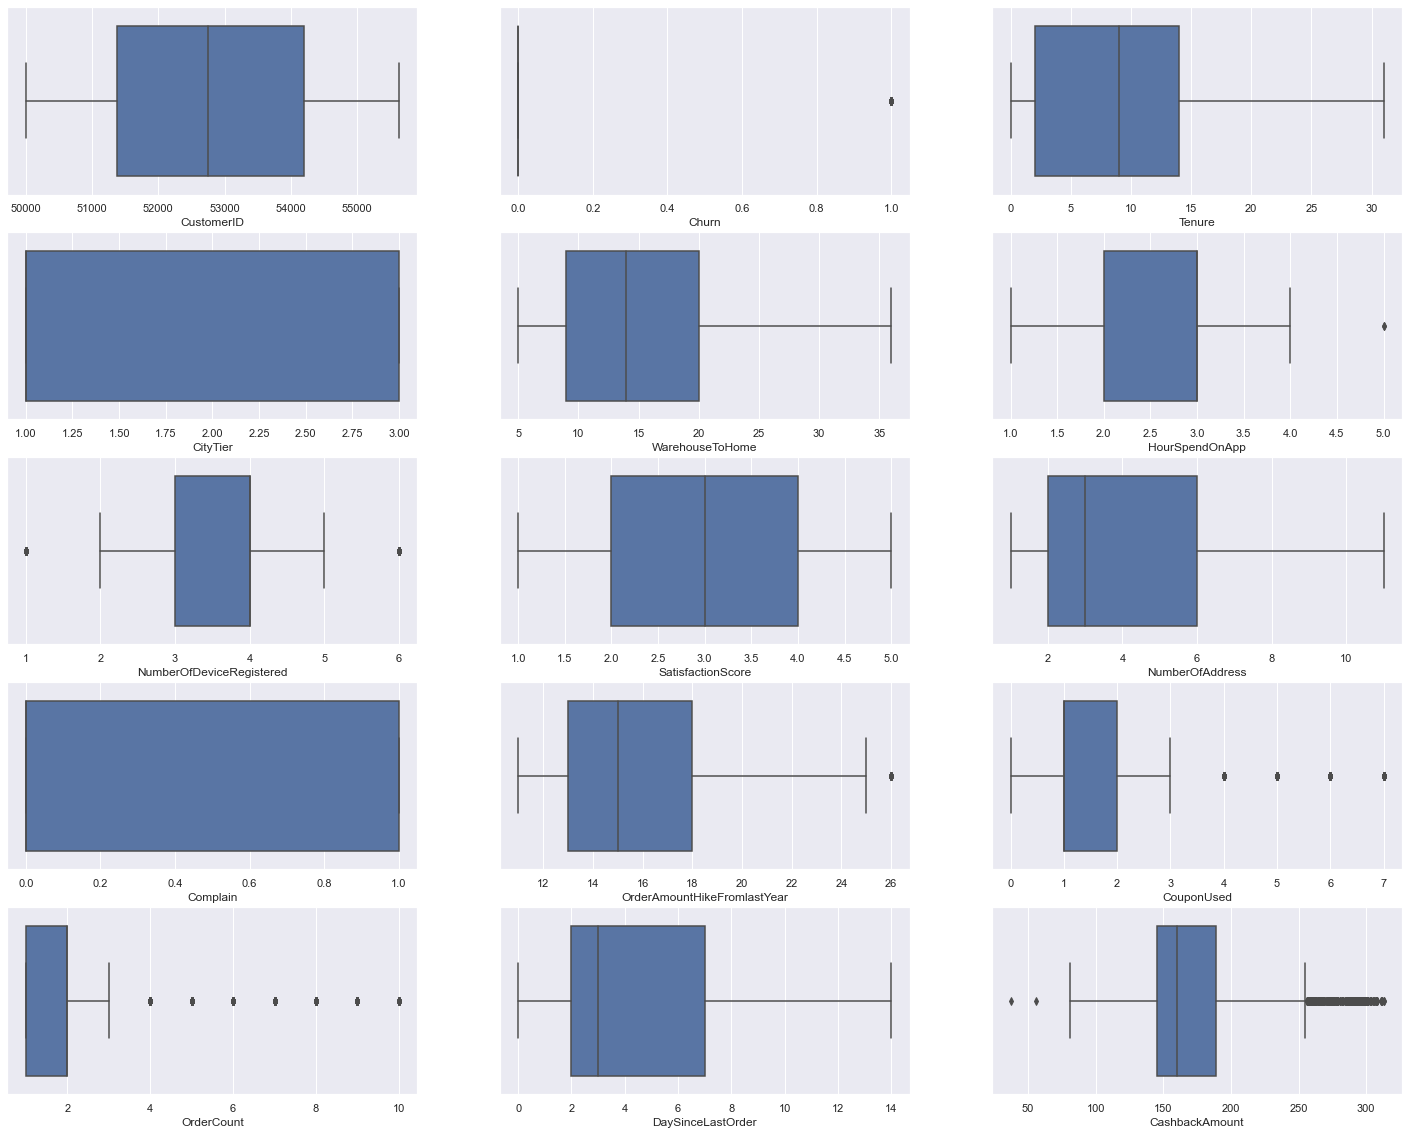

In [230]:
plt.figure(figsize=(25,20))
for i in range(len(numerikal)):
    plt.subplot(5,3,i+1)
    sns.boxplot(ecom[numerikal[i]])
    plt.tight_layout
plt.show()

In [231]:
ecom.shape

(5223, 20)

# Handling Duplicate Data

In [232]:
ecom[ecom.duplicated()]
# No duplicated data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


# Feature Engineering

In [233]:
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [234]:
ecom.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


- Customer ID = Id tiap customer (will be removed)
- Churn = Label customer churn atau tidak (1 Churn dan 0 tidak Churn)
- Tenure = lama pelanggan diukur dari pembelian pertama (buat kolom barlu tenure_group)
- PreferredLoginDevice = perangkat yang digunakan pelanggan untuk login
- CityTier = Tingkat kota
- WarehouseToHome = jarak gudang ke rumah 
- PreferredPaymentMode = metode pembayaran
- Gender = jenis kelamin
- HourSpendOnApp = jumlah jam yang dihabiskan pada aplikasi(kemungkinan diambil rata" tiap hari)
- PreferedOrderCat = kategori pesanan bulan lalu
- SatisfactionScore = tingkat kepuasan pelanggan (mungkin diambil dalam bentuk review bintang)
- MaritalStatus = status pernikahan customer
- NumberOfAddress = total alamat yang ditambahkan pada tiap customer
- Complain = apakah ada keluhan pada customer tersebut bulan lalu
- OrderAmountHikeFromlastYear = peningkatan presentase pembelian dari tahun lalu
- CouponUsed = total kupon yang digunakan pada bulan lalu
- OrderCount = jumlah pesanan yang dilakukan pada bulan kemarin
- DaySinceLastOrder = terakhir customer melakukan order
- CashbackAmount = rata' cashabck yang didapat pada bulan lalu

In [235]:
ecom.groupby(['Churn']).max()
# Orang yang churn memiliki nilai tenure tertinggi 21 berarti pelanggan lama (nilai tenure tinggi) cenderung untuk loyal atau tidak churn

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,,,,,,,,,,,,,,,,,,,
0,55630,31.0,Phone,3,36.0,UPI,Male,5.0,6,Others,5,Single,11,1,26.0,7.0,10.0,14.0,312.89
1,55622,21.0,Phone,3,36.0,UPI,Male,4.0,6,Others,5,Single,11,1,26.0,7.0,10.0,14.0,298.59


In [236]:
ecom['Tenure'].describe()
# 0 - 9.0 pelanggan baru
# 9.1 - 21 pelanggan menengah
# 21.1 - 31 pelanggan lama 

count    5223.000000
mean        9.600421
std         8.085301
min         0.000000
25%         2.000000
50%         9.000000
75%        14.000000
max        31.000000
Name: Tenure, dtype: float64

In [237]:
tenure_group = []

buat kolom baru
- Tenure_group = value (pelanggan baru, menengah dan pelanggan lama)

In [238]:
tenure_group = []
for row in ecom['Tenure']:
    if row <= 9.0:
        tenure_group.append('Baru')
    elif row > 9.0 and row <= 21.0:
        tenure_group.append('Menengah')
    elif row > 21.0:
        tenure_group.append('Lama')

In [239]:
ecom['tenure_group'] = tenure_group

In [240]:
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,Baru
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,Baru
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,Baru
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,Baru
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,Baru


In [241]:
ecom.to_excel('Data_already.xlsx')
# export file karena visualisasi dilakukan menggunakan powerBI

# Pre-Processing

- rubah value complain menjadi yes dan no
- dibagi menjadi 2 kolom one hot encoding complain_yes dan complain_no

In [242]:
ecom['PreferredLoginDevice'].value_counts()

Mobile Phone    2491
Computer        1522
Phone           1210
Name: PreferredLoginDevice, dtype: int64

In [243]:
numerikal

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [244]:
kategorikal.append('tenure_group')

In [245]:
kategorikal

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'tenure_group']

# Encoding sementara untuk feature selection

In [246]:
from sklearn import preprocessing

In [247]:
ecom_1 = ecom.copy()
# backup ecom before label encoding to ecom_1

In [248]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
cat_features = kategorikal
ecom[cat_features] = ecom[cat_features].apply(label_encoder.fit_transform)

In [249]:
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,50001,1,4.0,1,3,6.0,4,0,3.000000,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93,0
1,50002,1,9.0,2,1,8.0,6,1,3.000000,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90,0
2,50003,1,9.0,2,1,30.0,4,1,2.000000,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28,0
3,50004,1,0.0,2,3,15.0,4,1,2.000000,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07,0
4,50005,1,0.0,2,1,12.0,0,1,2.931535,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60,0


Try Using heatmap correlation

<AxesSubplot:>

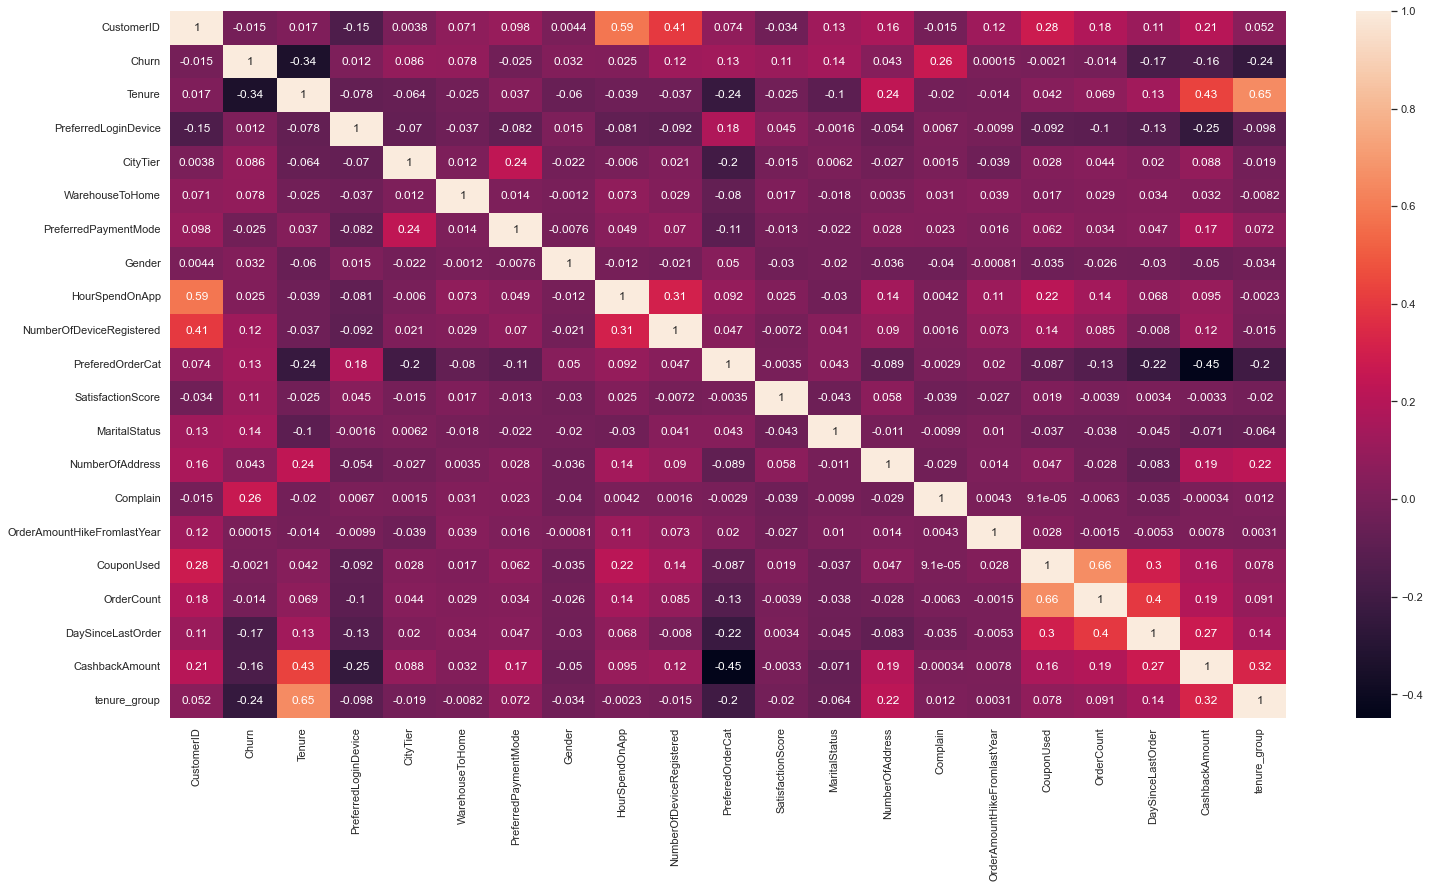

In [250]:
sns.set(rc = {'figure.figsize':(25,13)})
sns.heatmap(ecom.corr(), annot=True)

<AxesSubplot:>

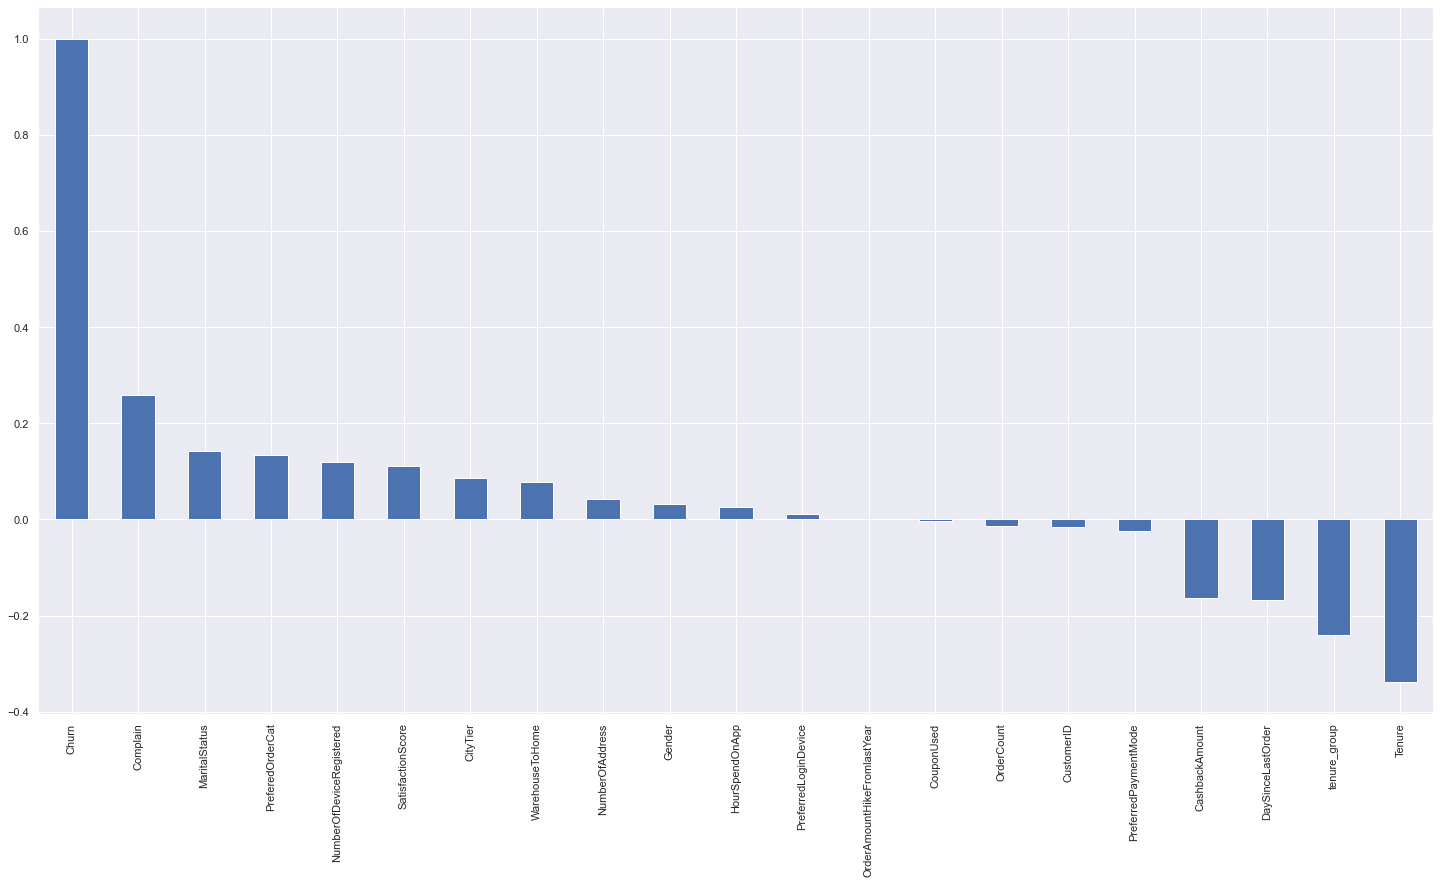

In [251]:
plt.figure(figsize=(25,13))
ecom.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') 

In [252]:
ecom.corr()['Churn'].sort_values(ascending=False)

Churn                          1.000000
Complain                       0.259538
MaritalStatus                  0.141698
PreferedOrderCat               0.133799
NumberOfDeviceRegistered       0.118772
SatisfactionScore              0.111701
CityTier                       0.085986
WarehouseToHome                0.078308
NumberOfAddress                0.042756
Gender                         0.031986
HourSpendOnApp                 0.025096
PreferredLoginDevice           0.011864
OrderAmountHikeFromlastYear    0.000149
CouponUsed                    -0.002112
OrderCount                    -0.013602
CustomerID                    -0.015316
PreferredPaymentMode          -0.024781
CashbackAmount                -0.162850
DaySinceLastOrder             -0.167950
tenure_group                  -0.241192
Tenure                        -0.337366
Name: Churn, dtype: float64

karena nilai korelasi cenderung kecil semua saya mencoba menggunakan metode lain

### RFE for feature selection

In [253]:
ecom = ecom.drop(['CustomerID','tenure_group'], axis =1)

In [254]:
target = ecom.Churn
ecom_feature = ecom.drop('Churn', axis =1)

In [255]:
target.value_counts()
# Imbalance

0    4321
1     902
Name: Churn, dtype: int64

In [256]:
y = target
x = ecom_feature

In [257]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [258]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [259]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
# Oversampling karena jumlah data hanya sedikit


In [260]:
oversample = ADASYN()
X, Y = oversample.fit_resample(x_train, y_train)

In [261]:
from collections import Counter

In [262]:
Counter(y_train)


Counter({1: 737, 0: 3441})

In [263]:
Counter(Y)

Counter({1: 3411, 0: 3441})

In [264]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

In [265]:
model = DecisionTreeClassifier()
n_features_to_select = 20
rfecv = RFECV(estimator=model, min_features_to_select= n_features_to_select)
rfecv = rfecv.fit(X,Y)

In [266]:
from operator import itemgetter

In [267]:
features = X.columns.to_list()
for x,y in (sorted(zip(rfecv.ranking_, features), key=itemgetter(0))):
    print(x,y)

1 Tenure
1 PreferredLoginDevice
1 CityTier
1 WarehouseToHome
1 PreferredPaymentMode
1 Gender
1 HourSpendOnApp
1 NumberOfDeviceRegistered
1 PreferedOrderCat
1 SatisfactionScore
1 MaritalStatus
1 NumberOfAddress
1 Complain
1 OrderAmountHikeFromlastYear
1 CouponUsed
1 OrderCount
1 DaySinceLastOrder
1 CashbackAmount


Karena setelah dilakukan feature selection ternyata semua variabel pada feature memiliki kasta yang setingkat, melihat dari korelasinya juga tidak ada yang terlalu mencolok, maka semua feature digunakan untuk melakukan modeling

# Melakukan encoding untuk modelling

In [268]:
ecom_new = ecom_1.copy()

In [269]:
ecom_new.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,tenure_group
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,Baru
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,Baru
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,Baru
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,Baru
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,Baru


In [270]:
ecom_new[kategorikal].nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
tenure_group            3
dtype: int64

- PreferredLoginDevice = one hot encoding
- PreferredPaymentMode = label encoding
- Gender                  = one hot encdoding
- PreferedOrderCat = label encoding
- MaritalStatus           = one hot
- tenure group dan customerid remove

In [271]:
ecom_new = ecom_new.drop(['CustomerID','tenure_group'], axis =1)

In [272]:
ecom_new.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [273]:
Lab_encode = ['PreferredPaymentMode', 'PreferedOrderCat']
ecom_new[Lab_encode] = ecom_new[Lab_encode].apply(label_encoder.fit_transform)
#one hot encoding
ecom_new = pd.get_dummies(ecom_new, columns=['PreferredLoginDevice', 'Gender', 'MaritalStatus'])

In [274]:
ecom_new.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,4,3.000000,3,2,2,9,1,11.0,1.0,1.0,5.0,159.93,0,1,0,1,0,0,0,1
1,1,9.0,1,8.0,6,3.000000,4,3,3,7,1,15.0,0.0,1.0,0.0,120.90,0,0,1,0,1,0,0,1
2,1,9.0,1,30.0,4,2.000000,4,3,3,6,1,14.0,0.0,1.0,3.0,120.28,0,0,1,0,1,0,0,1
3,1,0.0,3,15.0,4,2.000000,4,2,5,8,0,23.0,0.0,1.0,3.0,134.07,0,0,1,0,1,0,0,1
4,1,0.0,1,12.0,0,2.931535,3,3,5,3,0,11.0,1.0,1.0,3.0,129.60,0,0,1,0,1,0,0,1


In [275]:
ecom_new['Churn'].value_counts()

0    4321
1     902
Name: Churn, dtype: int64

Split data 

In [276]:
data_target = ecom_new.Churn
data_feature = ecom_new.drop('Churn', axis =1)

In [277]:
data_feature

,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,3,6.0,4,3.000000,3,2,2,9,1,11.0,1.0,1.0,5.0,159.93,0,1,0,1,0,0,0,1
1,9.0,1,8.0,6,3.000000,4,3,3,7,1,15.0,0.0,1.0,0.0,120.90,0,0,1,0,1,0,0,1
2,9.0,1,30.0,4,2.000000,4,3,3,6,1,14.0,0.0,1.0,3.0,120.28,0,0,1,0,1,0,0,1
3,0.0,3,15.0,4,2.000000,4,2,5,8,0,23.0,0.0,1.0,3.0,134.07,0,0,1,0,1,0,0,1
4,0.0,1,12.0,0,2.931535,3,3,5,3,0,11.0,1.0,1.0,3.0,129.60,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,1,30.0,3,3.000000,2,2,1,6,0,18.0,1.0,2.0,4.0,150.71,1,0,0,0,1,0,1,0
5626,13.0,1,13.0,3,3.000000,5,0,5,6,0,16.0,1.0,2.0,3.0,224.91,0,1,0,0,1,0,1,0
5627,1.0,1,11.0,4,3.000000,2,2,4,3,1,21.0,1.0,2.0,4.0,186.42,0,1,0,0,1,0,1,0
5628,23.0,3,9.0,3,4.000000,5,2,4,4,0,15.0,2.0,2.0,9.0,178.90,1,0,0,0,1,0,1,0


In [278]:
y = data_target
x = data_feature

In [279]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Oversampling

In [280]:
X, Y = oversample.fit_resample(x_train, y_train)

In [281]:
Counter

collections.Counter

Standardization

In [282]:
from sklearn.preprocessing import StandardScaler

In [283]:
# Standardization train data
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X)
x_data_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)

x_test_scaled = scaler.fit_transform(x_test)
x_data_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [284]:
x_data_train_scaled

,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.856973,1.513350,-0.234341,0.416738,1.580337,0.340901,1.169782,-1.572868,-0.446047,1.509222,1.836795,0.411620,-0.213255,-0.229271,-0.483559,-0.555843,-0.801269,1.890709,-0.672691,0.902540,-0.322613,1.253029,-0.674301
1,0.731225,-0.746900,-0.733479,-0.293195,1.580337,1.376664,-0.295614,-0.056575,-0.849721,-0.662593,0.136739,-0.358677,-0.213255,1.420413,-0.288379,-0.555843,1.248021,-0.528902,-0.672691,0.902540,-0.322613,1.253029,-0.674301
2,-0.195224,1.513350,-0.234341,1.126671,-1.435050,-0.694862,-0.295614,-0.056575,-1.253395,-0.662593,-0.996631,-1.128973,-0.767638,-0.559208,0.088953,-0.555843,1.248021,-0.528902,-0.672691,0.902540,-0.322613,1.253029,-0.674301
3,1.260624,0.383225,-0.858263,0.416738,1.580337,0.340901,1.169782,-1.572868,-0.849721,-0.662593,-0.429946,-0.358677,-0.213255,1.750350,-0.172844,-0.555843,1.248021,-0.528902,-0.672691,0.902540,-0.322613,-0.798066,1.483018
4,0.334175,-0.746900,1.512642,-0.293195,1.580337,0.340901,-0.295614,0.701572,0.764974,-0.662593,2.120138,0.411620,0.895513,-0.229271,1.151383,-0.555843,1.248021,-0.528902,1.486567,-1.107984,-0.322613,1.253029,-0.674301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,-0.750435,0.383225,-0.776528,-0.293195,0.246023,1.376664,-1.761011,-1.572868,-0.446047,-0.662593,-0.898881,1.863632,0.895513,-0.229271,1.499722,-0.555843,1.248021,-0.528902,-0.672691,0.902540,-0.322613,-0.798066,-0.674301
6817,-0.435937,0.383225,-0.427085,-0.293195,0.757833,1.376664,-1.761011,1.459719,2.783342,-0.662593,0.317120,2.022370,1.802826,-0.229271,1.510275,-0.555843,1.248021,-0.528902,-0.672691,0.902540,-0.322613,-0.798066,-0.674301
6818,-0.343668,0.383225,-0.940891,-0.293195,0.907991,1.376664,-1.761011,-0.056575,1.168647,-0.662593,-0.525668,1.525426,0.895513,-0.229271,1.516667,-0.555843,1.248021,-0.528902,-0.672691,0.902540,-0.322613,-0.798066,-0.674301
6819,-0.122684,0.383225,-1.030185,-0.293195,1.267618,1.376664,-1.761011,0.701572,1.975995,-0.662593,-0.322912,1.341689,0.895513,-0.229271,1.525872,-0.555843,1.248021,-0.528902,-0.672691,0.902540,3.099691,-0.798066,-0.674301


# Modeling

In [285]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [286]:
# Decision tree model
model_dt = DecisionTreeClassifier(criterion='gini')
model_dt.fit(x_data_train_scaled, Y)

prediction_test = model_dt.predict(x_data_test_scaled)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       880
           1       0.41      0.69      0.51       165

    accuracy                           0.79      1045
   macro avg       0.67      0.75      0.69      1045
weighted avg       0.85      0.79      0.81      1045



[[715 165]
 [ 51 114]]


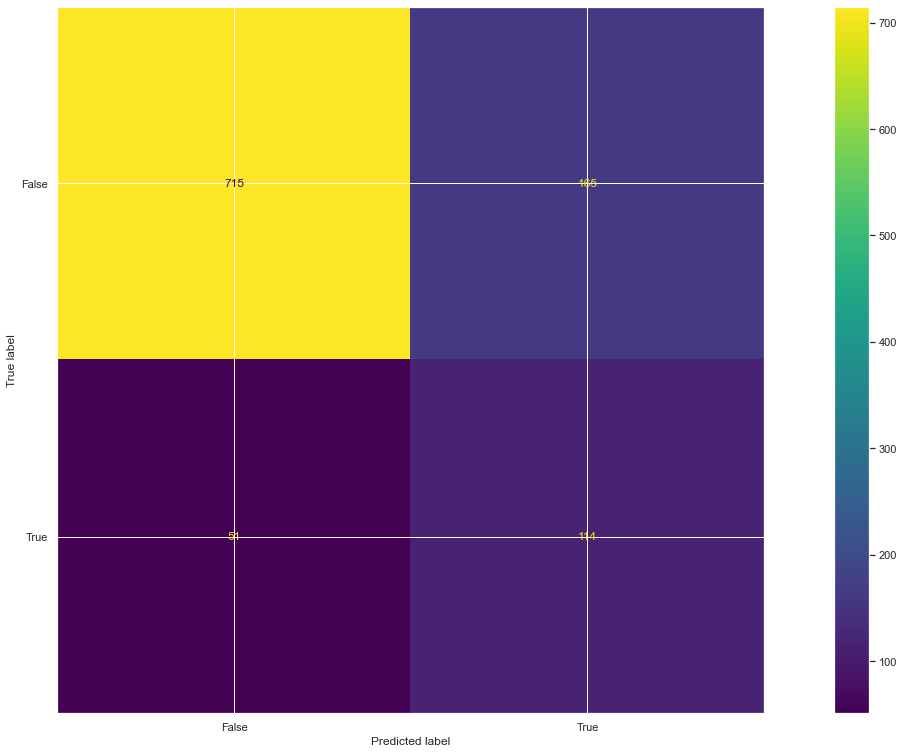

In [287]:
# Evaluation
print(confusion_matrix(y_test, prediction_test))
cm = metrics.confusion_matrix(y_test, prediction_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= [False, True])
disp.plot()
plt.show()

In [288]:
# Decision tree model withaout standardization
model_dt = DecisionTreeClassifier(criterion='gini')
model_dt.fit(X, Y)

prediction_test = model_dt.predict(x_test)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       880
           1       0.64      0.75      0.69       165

    accuracy                           0.89      1045
   macro avg       0.79      0.83      0.81      1045
weighted avg       0.90      0.89      0.90      1045



[[810  70]
 [ 42 123]]


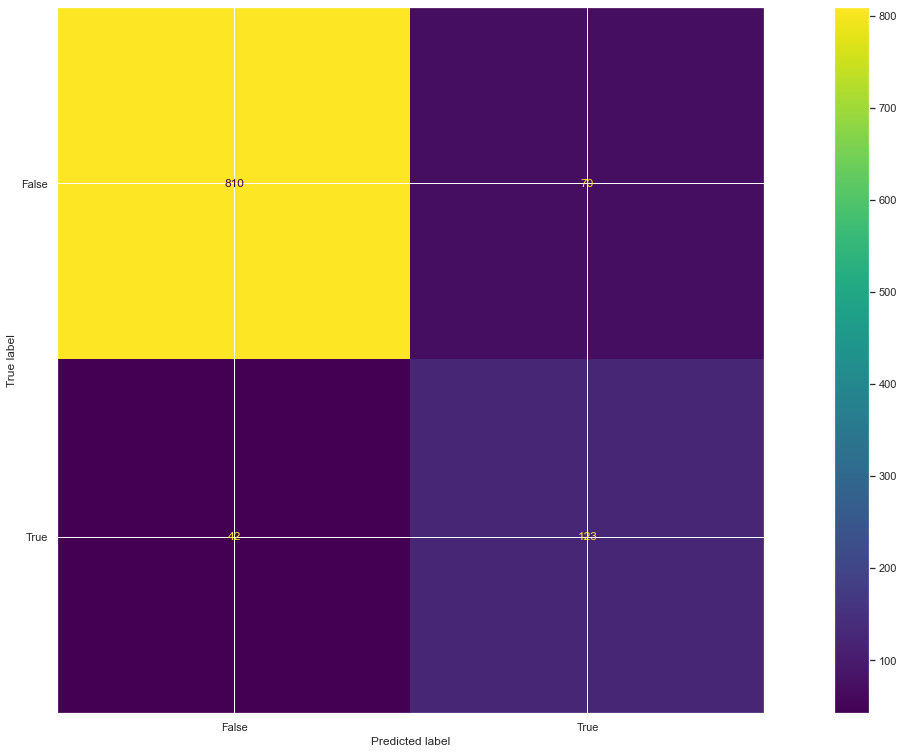

In [289]:
# Evaluation
print(confusion_matrix(y_test, prediction_test))
confu = metrics.confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
cm_display.plot()
plt.show()

In [290]:
# Random forest model
model_rf = RandomForestClassifier(n_estimators=2000, oob_score =True, n_jobs=-1,
                                  random_state=0, max_features="auto", max_leaf_nodes=30)
model_rf.fit(x_data_train_scaled, Y)

prediction_test = model_rf.predict(x_data_test_scaled)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       880
           1       0.36      0.85      0.51       165

    accuracy                           0.74      1045
   macro avg       0.66      0.79      0.67      1045
weighted avg       0.87      0.74      0.77      1045



[[633 247]
 [ 24 141]]


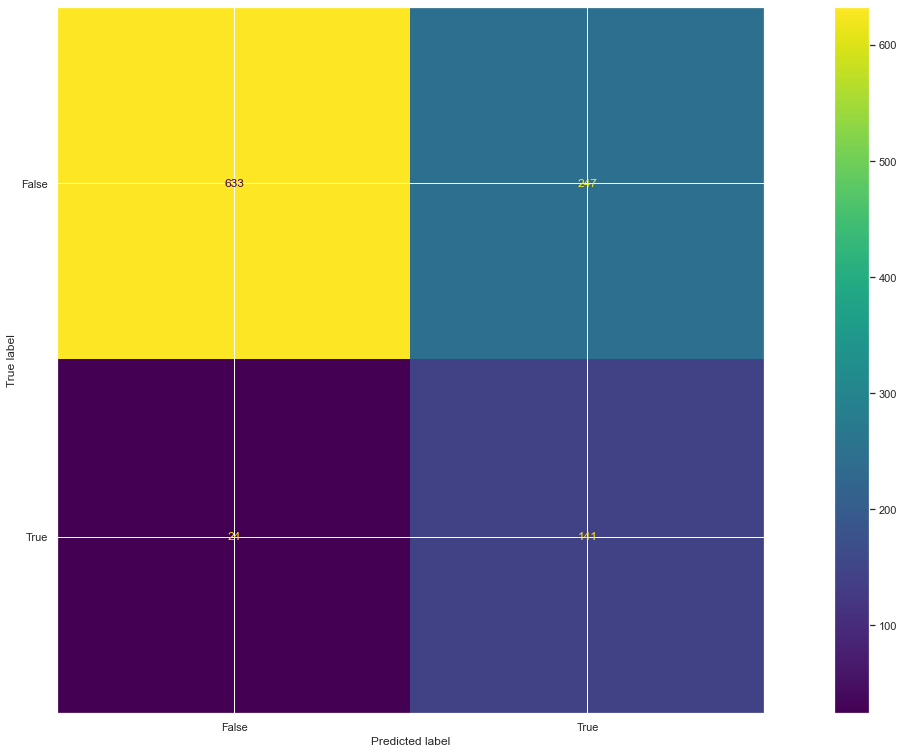

In [291]:
# Evaluation
print(confusion_matrix(y_test, prediction_test))
confu = metrics.confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
cm_display.plot()
plt.show()

In [292]:
# Random forest model without standardization
model_rf = RandomForestClassifier(n_estimators=2000, oob_score =True, n_jobs=-1,
                                  random_state=0, max_features="auto", max_leaf_nodes=30)
model_rf.fit(X, Y)

prediction_test = model_rf.predict(x_test)
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       880
           1       0.53      0.73      0.61       165

    accuracy                           0.85      1045
   macro avg       0.74      0.81      0.76      1045
weighted avg       0.88      0.85      0.86      1045



[[772 108]
 [ 44 121]]


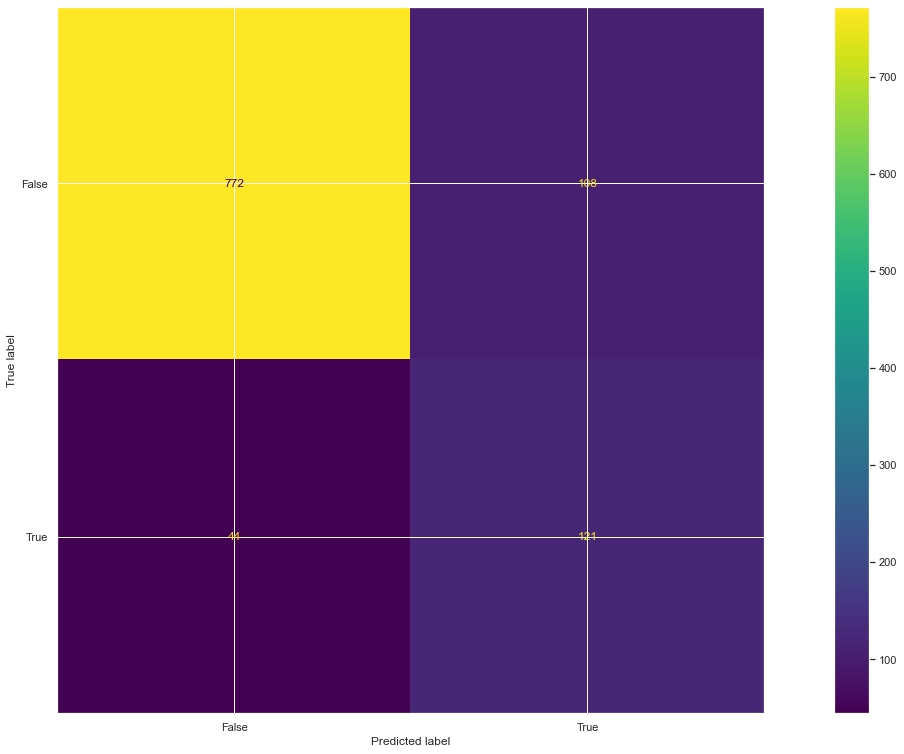

In [297]:
# Evaluation
print(confusion_matrix(y_test, prediction_test))
confu = metrics.confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
cm_display.plot()
plt.show()

# Hyperparameter Tuning

In [296]:
from sklearn.model_selection import GridSearchCV

In [299]:
# input parameter grid search
parameter_grid_search = [
    {'n_estimators': [25, 50, 75, 100, 200, 300, 400, 500 ], 'max_depth': [2,3,4,5,6,7,13,17,25 ,30, 35]},
    {'n_estimators': [25, 40, 120, 150, 175 ], 'max_depth': [2,3,4,5,6,7,13,17,25 ,30, 35]}
]

In [300]:
# metric perfroma
met = ['accuracy', 'f1_weighted']

##### Mencari parameter optimal untuk metric pengukuran accuracy
hasil parameter terbaik:  {'max_depth': 25, 'n_estimators': 500}
hasil classification report

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       880
           1       0.51      0.89      0.65       165

    accuracy                           0.85      1045
   macro avg       0.75      0.87      0.78      1045
weighted avg       0.90      0.85      0.86      1045

hasil confusion matrix

[[741 139]
 [ 18 147]]


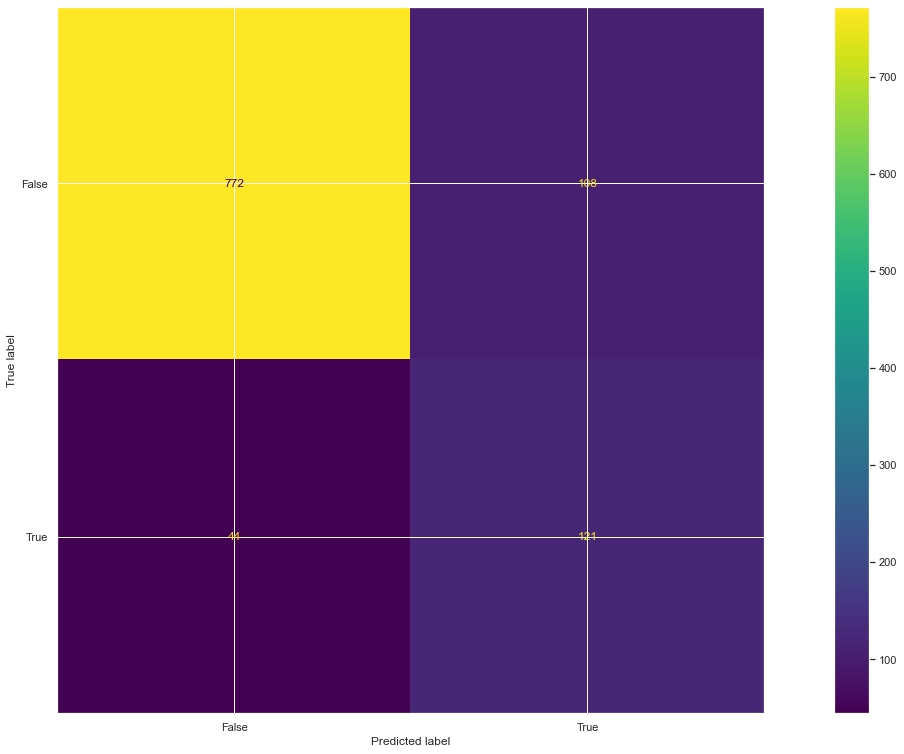

##### Mencari parameter optimal untuk metric pengukuran f1_weighted
hasil parameter terbaik:  {'max_depth': 25, 'n_estimators': 500}
hasil classification report

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       880
           1       0.51      0.89      0.65       165

    accuracy                           0.85      1045
   macro avg       0.75      0.87      0.78      1045
weighted avg       0.90      0.85      0.86      1045

hasil confusion matrix

[[741 139]
 [ 18 147]]


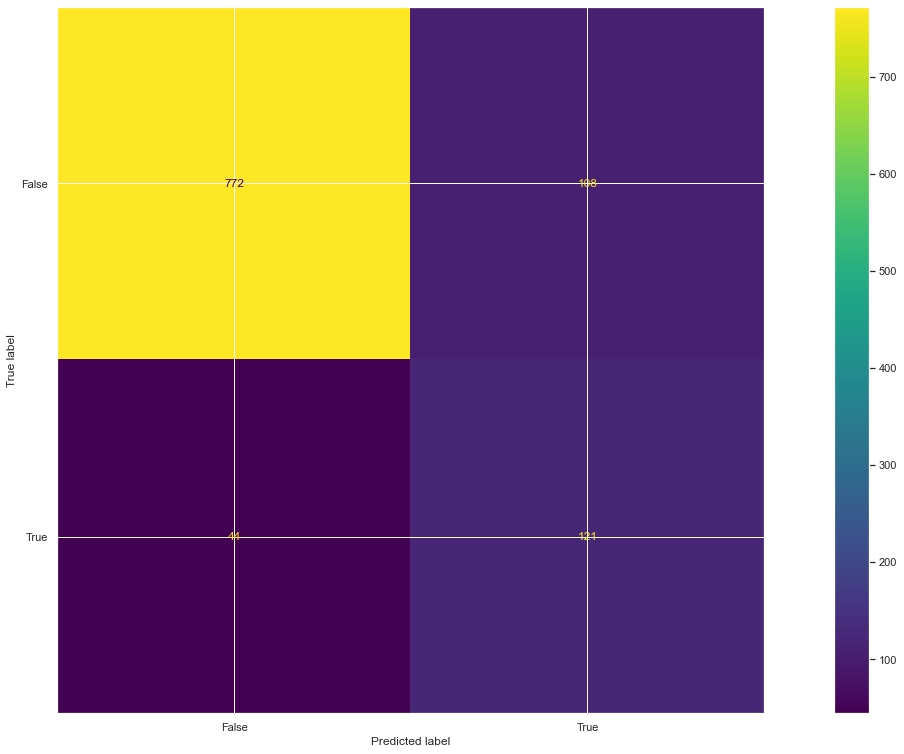

In [301]:
# Best Model dan parameter
for metric in met:
    print('##### Mencari parameter optimal untuk metric pengukuran', metric)
    classifier = GridSearchCV(RandomForestClassifier(random_state=0), parameter_grid_search, cv=5, scoring=metric)
    classifier.fit(x_data_train_scaled, Y)
    
    print('hasil parameter terbaik: ', classifier.best_params_)
    
    y_pred = classifier.predict(x_data_test_scaled)
    print('hasil classification report\n')
    print(classification_report(y_test, y_pred))
    print('hasil confusion matrix\n')
    print(confusion_matrix(y_test, y_pred))
    confu = metrics.confusion_matrix(y_test, prediction_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
    cm_display.plot()
    plt.show()

In [302]:
model_rf = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=25)
model_rf.fit(x_data_train_scaled, Y)

RandomForestClassifier(max_depth=25, n_estimators=500, random_state=0)

#### Export model to .pkl extension (pickle)

In [303]:
import pickle

In [305]:
filename = 'Churn_rf.pkl'
pickle.dump(model_rf, open(filename, 'wb'))